## Unequal Narratives? Investigating Media Bias in the Israel-Palestine Conflict

Subtopics:
1. Sentiment Analysis and Keyword Frequency of Headlines
2. Event Salience: Coverage vs. Casualties
3. Comparative Outlet Ideology

### Installation of requirements. 

The following cell contains all the necessary dependencies needed for this project.

Here we can add every dependency needed and describe it:
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`scikit-learn`](https://scikit-learn.org/stable/) is a Python package with different machinelearning algorithms. [Here](https://scikit-learn.org/stable/modules/classes.html) is the documentation of `sklearn`.
* [`seaborn`](https://seaborn.pydata.org/) is a Python package based on matplotlib that simplifies data visualization and works well with pandas DataFrames.
* [`nltk`](https://www.nltk.org/) is a Python package for working with natural language processing tasks. It includes tools for tokenization, stemming, and other NLP techniques.
* [`vaderSentiment`](https://pypi.org/project/vaderSentiment/) vaderSentiment: A Python library for sentiment analysis. It is particularly good for short texts like social media posts or headlines.
* [`transformers`](https://pypi.org/project/transformers/) is a Python library by Hugging Face for using pre-trained transformer models (like BERT, GPT, etc.) for various NLP tasks. 
* [`torch`](https://pytorch.org/) is aPython package for deep learning and machine learning. It's used as a backend for models like BERT and other neural network models.

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install seaborn
! pip install nltk vaderSentiment transformers
! pip install torch transformers
! pip install spacy
! pip install wordcloud

  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━

### Import requirements
The cell below imports all necessary dependancies.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import numpy as np
from sklearn.linear_model import LinearRegression
import string
import spacy
from collections import Counter
import matplotlib.pyplot as plt
spacy.cli.download("en_core_web_sm")
from wordcloud import WordCloud

/home/tina/Schreibtisch/CSS/1.Semester/FCSS/FCSS-Project-Group-10/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Data Preparation and Preprocessing

### Data cleaning

Link for the search query: https://search.mediacloud.org/search?qs=israe*%2520OR%2520palestin*%2520OR%2520hamas%2520OR%2520IDF&start=10-07-2023&end=01-07-2024&p=onlinenews-mediacloud&ss=1092%252C1%252C1095%252C7%252C2%252C101&cs=&any=any&name=israe*%20OR%20palestin*%20OR%20hamas%20OR%20IDF&edit=false

We obtained our dataset using the link above. We limited the query to 6 media outlets, one year time (07-10-2023 - 07-10-2024), and specified keywords that needed to be included in the articles that came up.


In [5]:
file_path = '../data/data.csv'
data = pd.read_csv(file_path)
data

,id,indexed_date,language,media_name,media_url,publish_date,title,url
0,609b49fdea2e02b3da9be8594a1e71daf839cc31cf184d...,2025-01-06 18:18:20.886953,en,nytimes.com,nytimes.com,2024-10-07,"Campuses Are Calmer, but They Are Not Normal, ...",https://www.nytimes.com/2024/10/07/us/campus-c...
1,e88291a5c2b82ede03a526071c1d1b8fa77e23fcec1edd...,2024-10-07 18:24:01.615866,en,nypost.com,nypost.com,2024-10-07,"Trump hints that he’s open to Richard Grenell,...",https://nypost.com/2024/10/07/us-news/donald-t...
2,f810fcfd715f8c7412f8da51c992b140f6db253abac936...,2024-10-07 13:28:40.202129,en,foxnews.com,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...,https://www.foxnews.com/world/hezbollah-rocket...
3,a360fa0abf34985b9a1db2e169dd9349f8e4e60d559e9f...,2024-10-07 23:23:57.316841,en,nypost.com,nypost.com,2024-10-07,"Kamala Harris, Emhoff plant tree for Oct. 7 vi...",https://nypost.com/2024/10/07/us-news/kamala-h...
4,1a06b76f8c6516a469b4a32a2f898b595487018e380483...,2024-10-08 06:33:09.401765,en,cnn.com,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...,https://www.cnn.com/2024/10/07/world/video/the...
...,...,...,...,...,...,...,...,...
25261,fb62dcff0bed5b4e07b6f3b453d399033142b144178a46...,2024-02-19 16:45:53.602867,en,washingtonpost.com,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...,https://www.washingtonpost.com/opinions/2023/1...
25262,b68f94c49afee4ad2427bc4a5a0a0a15d9ce67bf45b4fe...,2024-02-19 16:10:13.944341,en,nytimes.com,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...,https://www.nytimes.com/2023/10/07/world/middl...
25263,435cd12f57471cb4753902a4a4ea17cbaec8754465f728...,2024-02-19 17:45:25.642968,en,nytimes.com,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade,https://www.nytimes.com/2023/10/07/world/middl...
25264,682b2869c252ea3d5e134e14452bac72cf50db359fd156...,2024-02-19 17:15:09.644319,en,washingtontimes.com,washingtontimes.com,2023-10-07,Biden ready to offer ‘all means of appropriate...,https://www.washingtontimes.com/news/2023/oct/...


Filtering by keywords: We check if the title column contains any of the needed words, ignoring case sensitivity and handling missing values.

In [6]:
keywords = ["Gaza", "Israel", "Palestine", "West Bank", "Palestinian", "Hamas", "IDF", "Hezbollah", "Israeli"]
data_filtered = data[data['title'].str.contains('|'.join(keywords), case=False, na=False)]
data_filtered = data_filtered[data_filtered['language'] == 'en']

# Drop the 'id' and 'language' columns
data_cleaned = data_filtered.drop(columns=['id', 'indexed_date', 'language', 'media_url', 'url'])

data_cleaned = data_cleaned.rename(columns={
    "media_name": "Media Name",
    "publish_date": "Publish Date",
    "title": "Title",
})

cleaned_file_path = r'C:\Users\NejlaHidic\Desktop\Uni\Foundations of CSS\Project\data\data_cleaned_filtered.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

data_cleaned

,Media Name,Publish Date,Title
2,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...
4,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...
6,cnn.com,2024-10-07,Family member of Israeli hostages: ‘We never l...
7,nypost.com,2024-10-07,Israel establishes new military zone around Le...
10,nypost.com,2024-10-07,Oct. 7 anniversary live updates: Thousands of ...
...,...,...,...
25258,nytimes.com,2023-10-07,‘The Children Were Terrified.’ Fear Grips Isra...
25261,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...
25262,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...
25263,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade


### Analysis of Media Coverage
The bar chart below illustrates the number of posts published by six major US media outlets (CNN, NBC, NY Post, NY Times, Fox, and Wall Street Journal) related to Gaza, Israel, or Palestine during the selected timeframe. This analysis highlights variations in the volume of coverage among these outlets, offering insights into their reporting focus on the topic.

Media Name
foxnews.com            3590
nypost.com             3048
nytimes.com            2212
washingtontimes.com    1398
washingtonpost.com     1066
cnn.com                 727
Name: count, dtype: int64


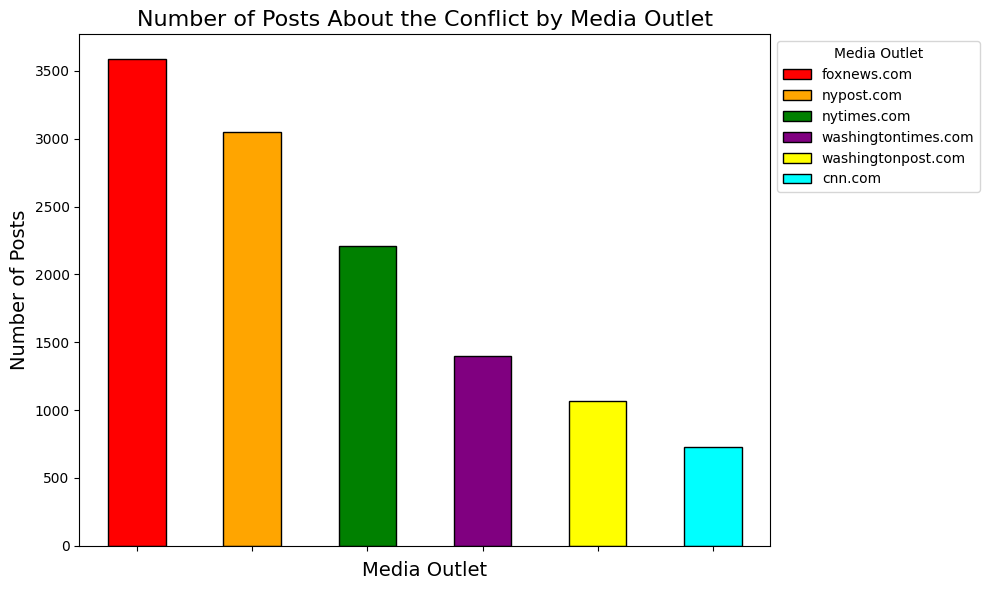

In [7]:
# Count the number of posts for each media outlet
media_counts = data_cleaned['Media Name'].value_counts()
print(media_counts)

# Define a specific color mapping for each media outlet
color_map = {
    'foxnews.com': 'red',
    'cnn.com': 'cyan',
    'nytimes.com': 'green',
    'washingtontimes.com': 'purple',
    'nypost.com': 'orange',
    'washingtonpost.com': 'yellow'
}

# Create a list of colors according to the color_map
colors = media_counts.index.map(color_map)

# Create the plot with specific colors
plt.figure(figsize=(10, 6))
bars = media_counts.plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Number of Posts About the Conflict by Media Outlet", fontsize=16)

# Remove the media names on the x-axis
plt.xticks(ticks=np.arange(len(media_counts)), labels=[""] * len(media_counts))

# Add the legend with media names
plt.legend(bars.patches, media_counts.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
def clean_media_data(file_path):
    
    data = pd.read_csv(file_path)
    
    # Drop unnecessary columns
    data_cleaned = data[data['language'] == 'en']
    data_cleaned = data_cleaned.drop(columns=['id', 'indexed_date', 'media_url', 'url', 'language'])
    
    data_cleaned = data_cleaned.rename(columns={
        "media_name": "Media Name",
        "publish_date": "Publish Date",
        "title": "Title",
    })

    # Count the number of entries by media name
    media_counts = data_cleaned['Media Name'].value_counts()
    
    # Print the number of entries for each media outlet
    for media, count in media_counts.items():
        print(f"Number of entries for {media}: {count}")
    
    return data_cleaned

In [9]:
# Read in the news CSV file
fox_file_path = '../data/fox.csv'
fox_cleaned = clean_media_data(fox_file_path)

cnn_file_path = '../data/cnn.csv'
cnn_cleaned = clean_media_data(cnn_file_path)

nypost_file_path = '../data/nypost.csv'
nypost_cleaned = clean_media_data(nypost_file_path)

nytimes_file_path = '../data/nytimes.csv'
nytimes_cleaned = clean_media_data(nytimes_file_path)

washingtonpost_file_path = '../data/washingtonpost.csv'
washingtonpost_cleaned = clean_media_data(washingtonpost_file_path)

washingtontimes_file_path = '../data/washingtontimes.csv'
washingtontimes_cleaned = clean_media_data(washingtontimes_file_path)


Number of entries for foxnews.com: 52599
Number of entries for cnn.com: 9351
Number of entries for nypost.com: 71485
Number of entries for nytimes.com: 43011
Number of entries for washingtonpost.com: 16747
Number of entries for washingtontimes.com: 29683


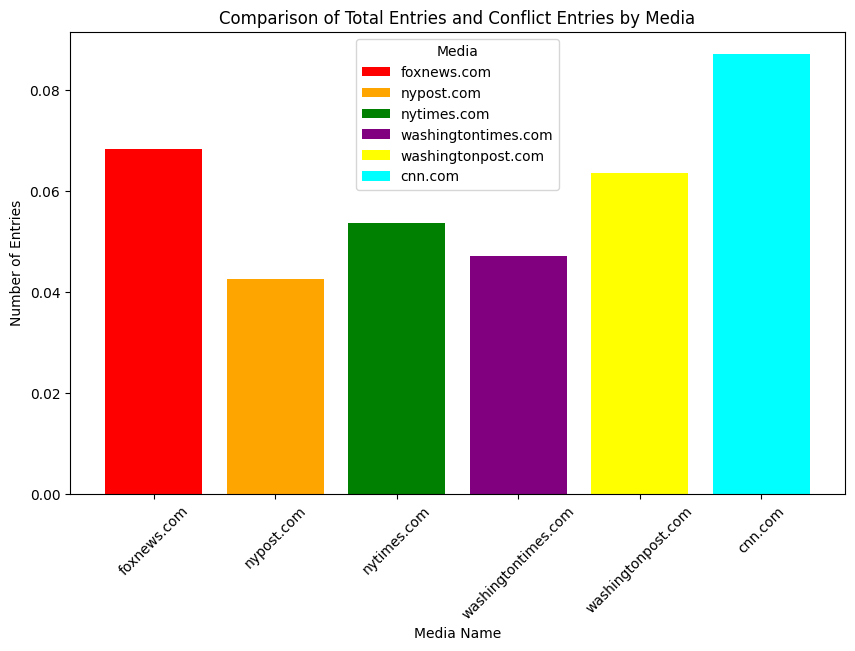

In [10]:
total_entries = {
    'foxnews.com': 52599,
    'cnn.com': 9351,
    'nypost.com': 71485,
    'nytimes.com': 43011,
    'washingtonpost.com': 16747,
    'washingtontimes.com': 29683
}

conflict_entries = {
    'foxnews.com': 3590,
    'nypost.com': 3048,
    'nytimes.com': 2312,
    'washingtontimes.com': 1398,
    'washingtonpost.com': 1066,
    'cnn.com': 815
}

normalized_data = {
    key: conflict_entries[key] / total_entries[key]
    for key in conflict_entries
}

fig, ax = plt.subplots(figsize=(10, 6))
for media in normalized_data:
    ax.bar(media, normalized_data[media], color=color_map[media], label=media)

ax.set_xlabel('Media Name')
ax.set_ylabel('Number of Entries')
ax.set_title('Comparison of Total Entries and Conflict Entries by Media')
ax.legend(title='Media')
plt.xticks(rotation=45)
plt.show()


## 1 Sentiment Analysis and Keyword Frequency of Headlines

### 1.1 Sentiment Score with VADER

This plot shows the average sentiment score for each media outlet, with different colors representing each outlet. It provides an overview of the tone (positive, neutral, or negative) in the media's reporting on the Israel-Palestine conflict.


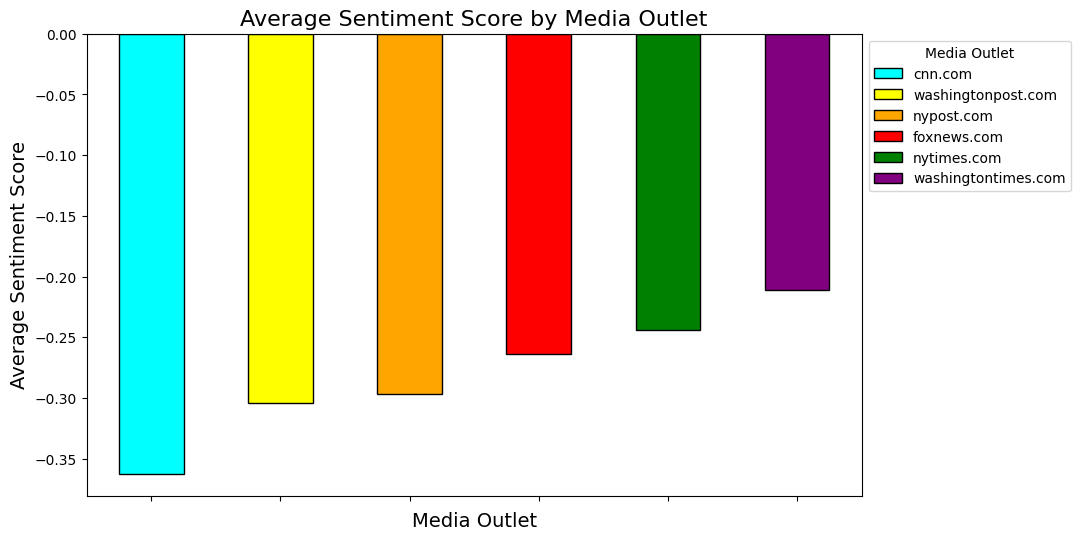

In [11]:
analyzer = SentimentIntensityAnalyzer()

data_cleaned['Sentiment Score'] = data_cleaned['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data_cleaned

avg_sentiment_by_outlet = data_cleaned.groupby('Media Name')['Sentiment Score'].mean().sort_values()

# Create a list of colors according to the color_map
colors = avg_sentiment_by_outlet.index.map(color_map)

# Plot the average sentiment by outlet with specific colors
plt.figure(figsize=(10, 6))
bars = avg_sentiment_by_outlet.plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Average Sentiment Score by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts)), labels=[""] * len(media_counts))
plt.legend(bars.patches, avg_sentiment_by_outlet.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The following plot allows us to observe how the sentiment regarding the Israel-Palestine conflict has changed over time, providing insights into the tone of media coverage on a monthly basis.

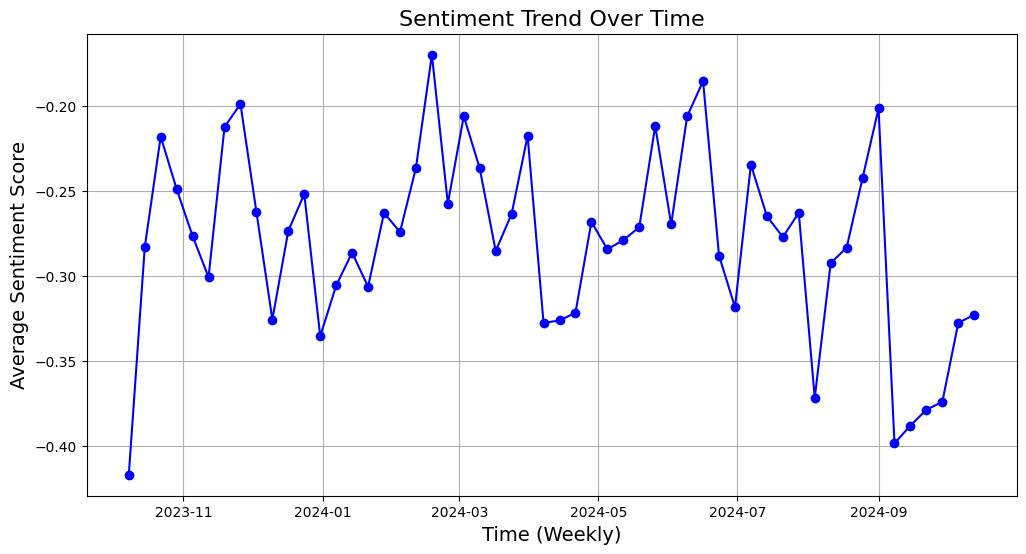

In [12]:
# Convert 'Publish Date' to datetime format
data_cleaned['Publish Date'] = pd.to_datetime(data_cleaned['Publish Date'], errors='coerce')
data_cleaned = data_cleaned.reset_index(drop=True)

# Calculate average sentiment score by month
sentiment_over_time = data_cleaned.resample('W', on='Publish Date')['Sentiment Score'].mean()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o', color='blue')
plt.xlabel("Time (Weekly)", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.grid()
plt.show()

The following plot shows how the sentiment has changed over time for each media outlet separately. 

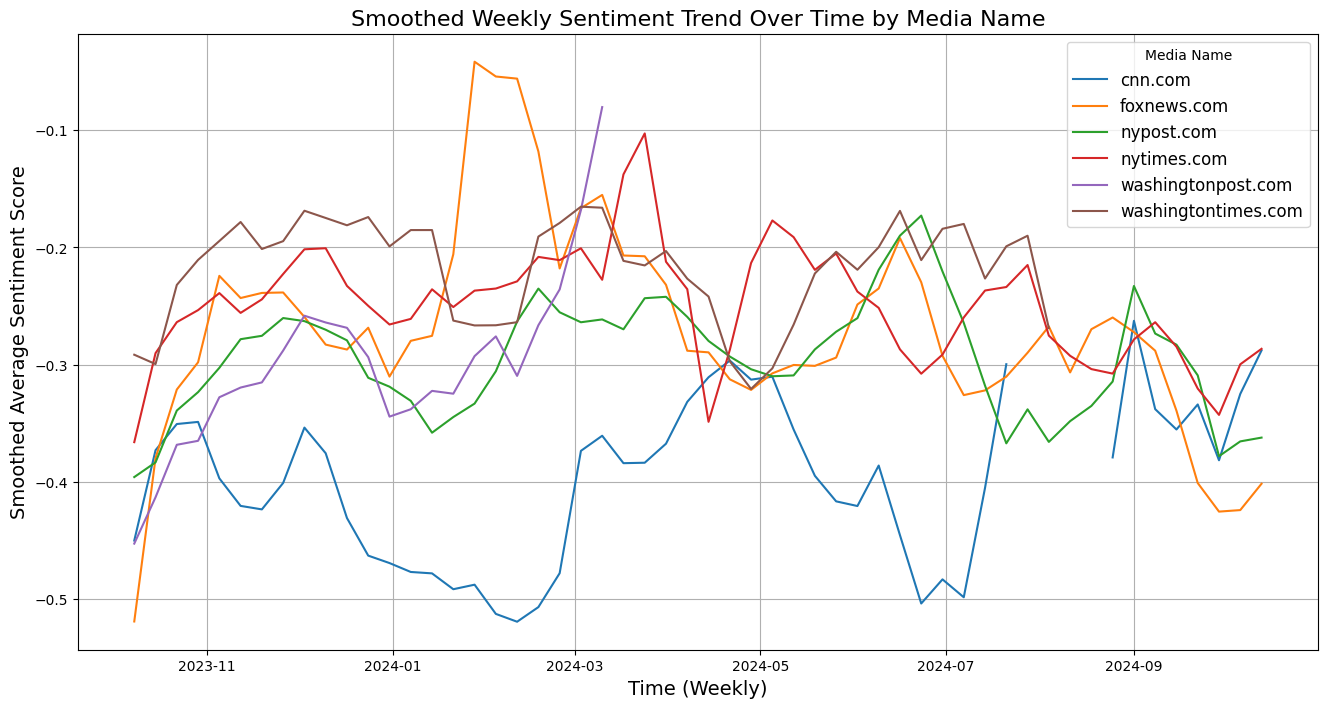

In [13]:
# Group by Media Name and resample by day to calculate average sentiment score
sentiment_weekly = data_cleaned.groupby('Media Name').resample('W', on='Publish Date')['Sentiment Score'].mean()

# Reset index for easier plotting
sentiment_weekly = sentiment_weekly.reset_index()

window_size = 4  # 4-week (approximately one month) moving average
sentiment_weekly['Smoothed Sentiment'] = (
    sentiment_weekly.groupby('Media Name')['Sentiment Score']
    .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
)

# Plot sentiment over time for each Media Name
plt.figure(figsize=(16, 8))

# Iterate over unique Media Names to create a plot for each
for media_name in sentiment_weekly['Media Name'].unique():
    media_data = sentiment_weekly[sentiment_weekly['Media Name'] == media_name]
    plt.plot(media_data['Publish Date'], media_data['Smoothed Sentiment'], label=media_name)

# Add labels, legend, and title
plt.xlabel("Time (Weekly)", fontsize=14)
plt.ylabel("Smoothed Average Sentiment Score", fontsize=14)
plt.title("Smoothed Weekly Sentiment Trend Over Time by Media Name", fontsize=16)
plt.legend(title="Media Name", fontsize=12)
plt.grid()
plt.show()

The next plot helps visualize how each media outlet covers the Israel-Palestine conflict, categorizing headlines into positive, neutral, or negative sentiments. It provides a clear overview of the tone in which each media outlet reports on the conflict.

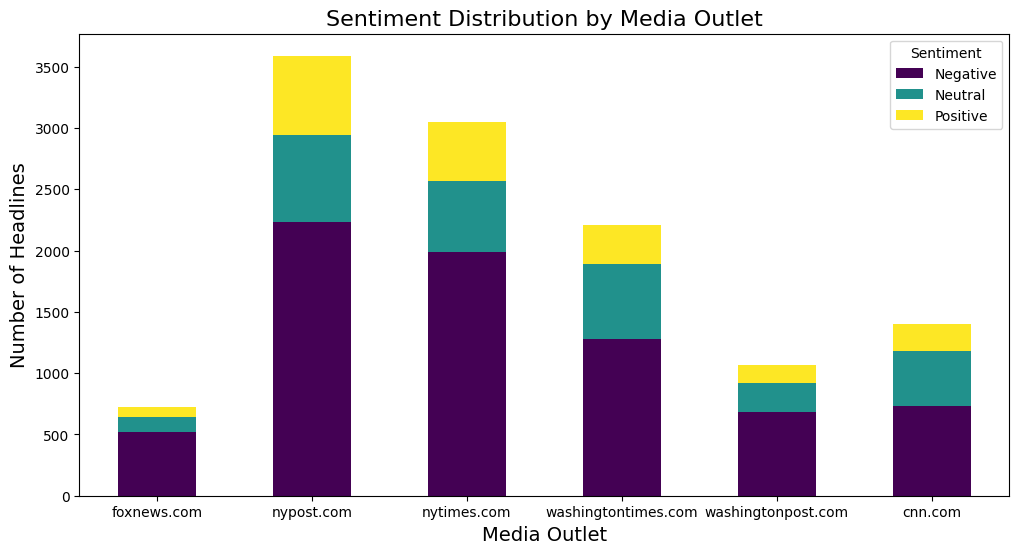

In [14]:
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

data_cleaned['Sentiment Label'] = data_cleaned['Sentiment Score'].apply(classify_sentiment)

#positive, neutral, and negative headlines by media outlet
sentiment_counts = data_cleaned.groupby(['Media Name', 'Sentiment Label']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Headlines", fontsize=14)
plt.title("Sentiment Distribution by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts)), labels=media_counts.index, rotation=0)
plt.legend(title="Sentiment")
plt.show()


Analysis of sentiment regarding different actors

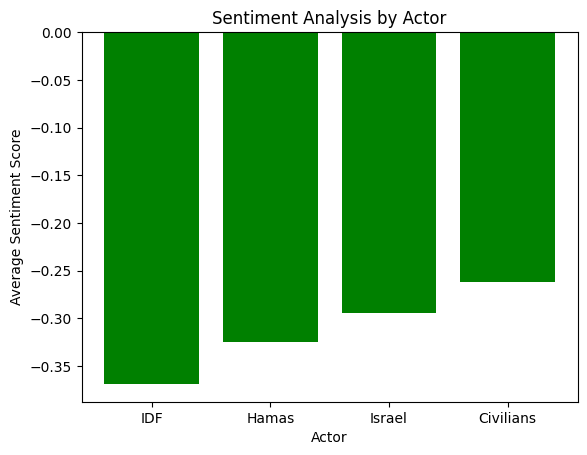

In [15]:
actors = {
    "IDF": "IDF",
    "Hamas": "Hamas",
    "Israel": "Israel|Israeli",
    "Civilians": "civilian|civilians"
}
actor_sentiments = {}
for actor, keyword in actors.items():
    actor_data = data_cleaned[data_cleaned['Title'].str.contains(keyword, case=False, na=False)]
    actor_sentiments[actor] = actor_data['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()

plt.bar(actor_sentiments.keys(), actor_sentiments.values(), color='green')
plt.title("Sentiment Analysis by Actor")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Actor")
plt.show()

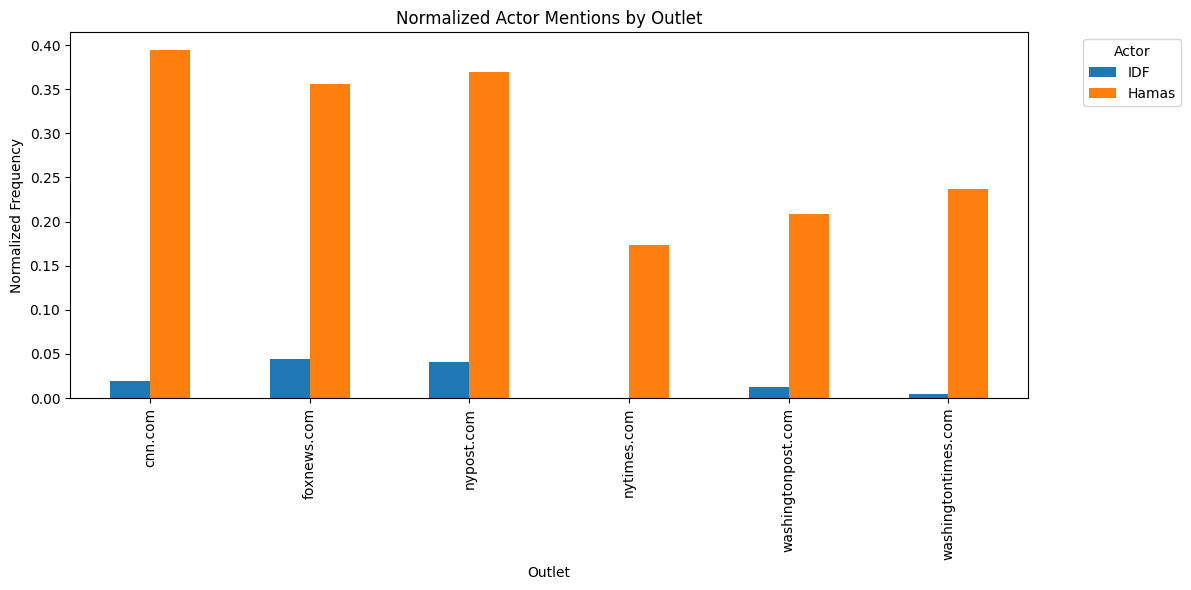

In [16]:
outlet_article_counts = data_cleaned['Media Name'].value_counts().to_dict()

actors = { 'IDF': 'IDF',
        'Hamas': 'Hamas'}

actor_counts = {}
for actor, keyword in actors.items():
    actor_counts[actor] = (
        data_cleaned[data_cleaned['Title'].str.contains(keyword, case=False, na=False)]
        .groupby('Media Name')['Title']
        .count()
        .divide(pd.Series(outlet_article_counts))
    )

# Combine into a DataFrame
actor_counts_df = pd.DataFrame(actor_counts).fillna(0)

# Plot normalized frequencies
actor_counts_df.plot(kind='bar', figsize=(12, 6))
plt.title("Normalized Actor Mentions by Outlet")
plt.xlabel("Outlet")
plt.ylabel("Normalized Frequency")
plt.legend(title="Actor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


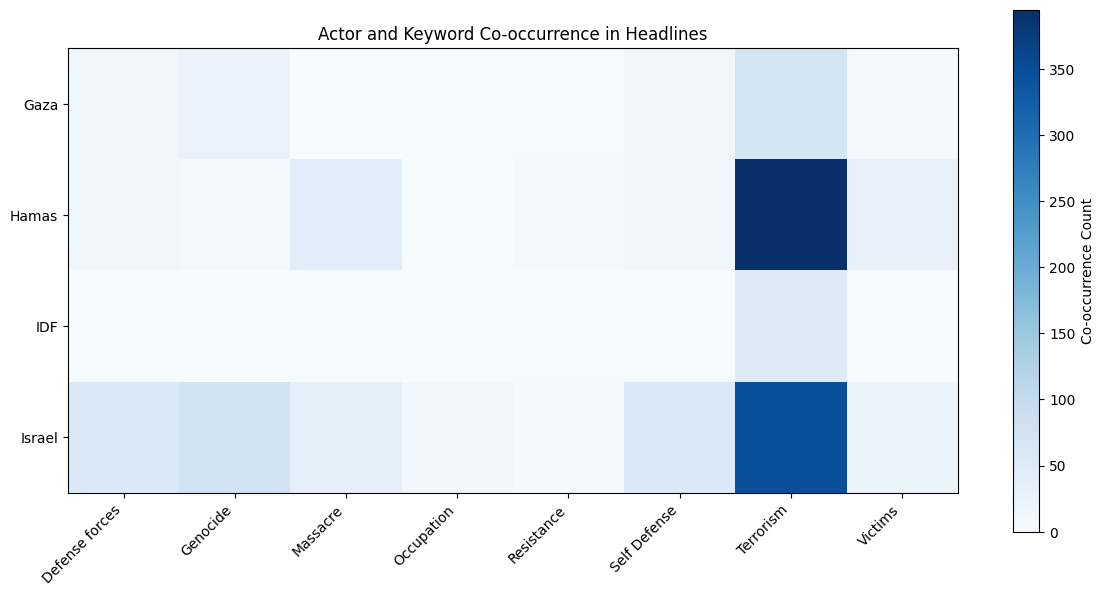

In [17]:
import itertools
import seaborn as sns

actors = {
    "IDF": "IDF",
    "Hamas": "Hamas",
    "Israel": "Israel|Israeli",
    "Gaza": "Gaza"
}

keywords = {
    "Self Defense": "self-defense|self defence|defense|defence",
    "Terrorism": "terrorist|terrorism|terror",
    "Massacre": "massacre|massacres",
    "Occupation": "occupator|occupation",
    #"Extremism": "extremism|extremist|extremists",
    #"Democracy": "democracy|democratic",
    "Defense forces": "defense|defense forces",
    "Resistance": "resistance",
    "Victims": "victim|victims",
    #"Innocent": "innocent",
    #"Collateral damage": "collateral damage",
    "Genocide": "genocide|genocidal"
}

# Function to extract mentions of actors and keywords
def extract_keywords_and_terms(text, actor_keywords, term_keywords):
    """
    Extract mentions of both actors and terms from the text.
    """
    extracted = []
    for actor, keyword in actor_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(actor)
    for term, keyword in term_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(term)
    return extracted

# Create the column for extracted actors and terms
data_cleaned['Extracted Actors and Terms'] = data_cleaned['Title'].apply(
    lambda x: extract_keywords_and_terms(x, actors, keywords)
)

# Function to filter co-occurrences to only include actor-keyword pairs
def filter_actor_term_cooccurrences(extracted_entities, actors_list, keywords_list):
    """
    Filters co-occurrences to only include pairs where one entity is an actor and the other is a keyword.
    """
    return [
        (actor, keyword)
        for actor in extracted_entities
        for keyword in extracted_entities
        if actor in actors_list and keyword in keywords_list
    ]

# List of actors and keywords for filtering
actor_list = list(actors.keys())
keyword_list = list(keywords.keys())

# Calculate filtered co-occurrences
filtered_co_occurrences = Counter(itertools.chain.from_iterable(
    filter_actor_term_cooccurrences(row, actor_list, keyword_list)
    for row in data_cleaned['Extracted Actors and Terms'] if row
))

# Convert to DataFrame for visualization
filtered_co_occurrence_df = pd.DataFrame(
    [(pair[0], pair[1], count) for pair, count in filtered_co_occurrences.items()],
    columns=['Actor', 'Keyword', 'Co-occurrence Count']
)

# Pivot for heatmap
filtered_co_occurrence_matrix = filtered_co_occurrence_df.pivot(index='Actor', columns='Keyword', values='Co-occurrence Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
plt.imshow(filtered_co_occurrence_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Co-occurrence Count")
plt.xticks(range(len(filtered_co_occurrence_matrix.columns)), filtered_co_occurrence_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(filtered_co_occurrence_matrix.index)), filtered_co_occurrence_matrix.index)
plt.title("Actor and Keyword Co-occurrence in Headlines")
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import itertools
from collections import Counter, defaultdict
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

actors = {
    "IDF": "IDF",
    "Hamas": "Hamas",
    "Israel": "Israel|Israeli",
    "Gaza": "Gaza"
}

keywords = {
    "Self Defense": "self-defense|self defence|defense|defence",
    "Terrorism": "terrorist|terrorism|terror",
    "Massacre": "massacre|massacres",
    "Occupation": "occupator|occupation",
    #"Extremism": "extremism|extremist|extremists",
    #"Democracy": "democracy|democratic",
    "Defense forces": "defense|defense forces",
    "Resistance": "resistance",
    "Victims": "victim|victims",
    #"Innocent": "innocent",
    #"Collateral damage": "collateral damage",
    "Genocide": "genocide|genocidal"
}
# Function to extract mentions of actors and keywords
def extract_keywords_and_terms(text, actor_keywords, term_keywords):
    """
    Extract mentions of both actors and terms from the text.
    """
    extracted = []
    for actor, keyword in actor_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(actor)
    for term, keyword in term_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(term)
    return extracted

# Create a column for extracted actors and terms
data_cleaned['Extracted Actors and Terms'] = data_cleaned['Title'].apply(
    lambda x: extract_keywords_and_terms(x, actors, keywords)
)

# Function to filter co-occurrences to only include actor-keyword pairs
def filter_actor_term_cooccurrences(extracted_entities, actors_list, keywords_list):
    """
    Filters co-occurrences to only include pairs where one entity is an actor and the other is a keyword.
    """
    return [
        (actor, keyword)
        for actor in extracted_entities
        for keyword in extracted_entities
        if actor in actors_list and keyword in keywords_list
    ]

# List of actors and keywords for filtering
actor_list = list(actors.keys())
keyword_list = list(keywords.keys())

# Calculate filtered co-occurrences
filtered_co_occurrences = Counter(itertools.chain.from_iterable(
    filter_actor_term_cooccurrences(row, actor_list, keyword_list)
    for row in data_cleaned['Extracted Actors and Terms'] if row
))

def calculate_sentiment_for_cooccurrences(data, actor_keywords, term_keywords, sentiment_analyzer):
    sentiment_data = defaultdict(list)
    for _, row in data.iterrows():
        # Check if the row contains a valid list of extracted entities
        extracted_entities = row['Extracted Actors and Terms']
        if isinstance(extracted_entities, list) and extracted_entities:
            sentiment = sentiment_analyzer.polarity_scores(row['Title'])['compound']  # Compound sentiment score
            for actor in actor_keywords.keys():
                for term in term_keywords.keys():
                    if actor in extracted_entities and term in extracted_entities:
                        sentiment_data[(actor, term)].append(sentiment)
    # Calculate average sentiment for each pair
    average_sentiments = {pair: np.mean(scores) for pair, scores in sentiment_data.items()}
    return average_sentiments
    
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate average sentiment for co-occurrences
average_sentiments = calculate_sentiment_for_cooccurrences(
    data_cleaned, actors, keywords, analyzer
)

# Combine co-occurrence counts and sentiment into a single DataFrame
combined_data = []
for pair, count in filtered_co_occurrences.items():
    sentiment = average_sentiments.get(pair, np.nan)
    combined_data.append((*pair, count, sentiment))

combined_df = pd.DataFrame(combined_data, columns=['Actor', 'Keyword', 'Co-occurrence Count', 'Average Sentiment'])

# Pivot data for visualization
count_matrix = combined_df.pivot(index='Actor', columns='Keyword', values='Co-occurrence Count').fillna(0)
sentiment_matrix = combined_df.pivot(index='Actor', columns='Keyword', values='Average Sentiment').fillna(0)

# Plotting the heatmap with overlaid sentiment
plt.figure(figsize=(10, 8))
sns.heatmap(count_matrix, annot=sentiment_matrix, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Co-occurrence Count'})
plt.title("Actor and Keyword Co-occurrence with Average Sentiment")
plt.xlabel("Keyword")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/home/tina/nltk_data'
    - '/home/tina/Schreibtisch/CSS/1.Semester/FCSS/FCSS-Project-Group-10/venv/nltk_data'
    - '/home/tina/Schreibtisch/CSS/1.Semester/FCSS/FCSS-Project-Group-10/venv/share/nltk_data'
    - '/home/tina/Schreibtisch/CSS/1.Semester/FCSS/FCSS-Project-Group-10/venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


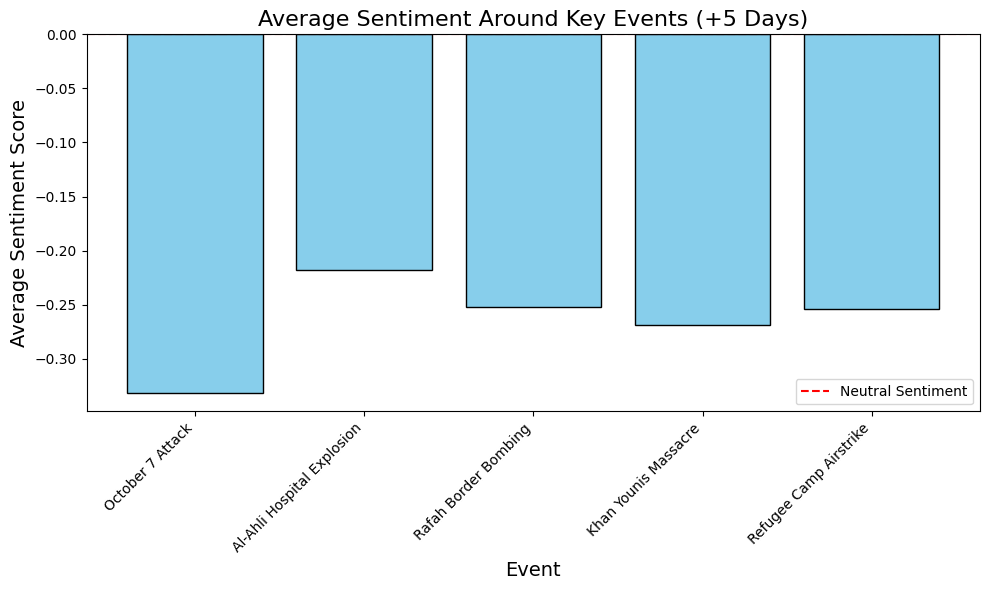

In [19]:
# Define key events with their dates
key_events = {
    "October 7 Attack": "2023-10-07",
    "Al-Ahli Hospital Explosion": "2023-10-17",
    "Rafah Border Bombing": "2023-11-01",
    "Khan Younis Massacre": "2023-12-10",
    "Refugee Camp Airstrike": "2024-07-08"
}

# Create a new DataFrame to store filtered results
event_sentiments = []

for event_name, event_date in key_events.items():
    event_date = pd.to_datetime(event_date)
    time_frame = (data_cleaned['Publish Date'] >= event_date) & (data_cleaned['Publish Date'] <= event_date + pd.Timedelta(days=5))
    event_data = data_cleaned[time_frame]
    
    # Calculate average sentiment for the time frame
    avg_sentiment = event_data['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()
    
    # Append results
    event_sentiments.append({"Event": event_name, "Date": event_date, "Average Sentiment": avg_sentiment})

event_sentiments_df = pd.DataFrame(event_sentiments)


plt.figure(figsize=(10, 6))
plt.bar(event_sentiments_df['Event'], event_sentiments_df['Average Sentiment'], color='skyblue', edgecolor='black')
plt.title("Average Sentiment Around Key Events (+5 Days)", fontsize=16)
plt.xlabel("Event", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='red', linestyle='--', label='Neutral Sentiment')
plt.legend()
plt.tight_layout()
plt.show()


### 1.3 Keyword Analysing

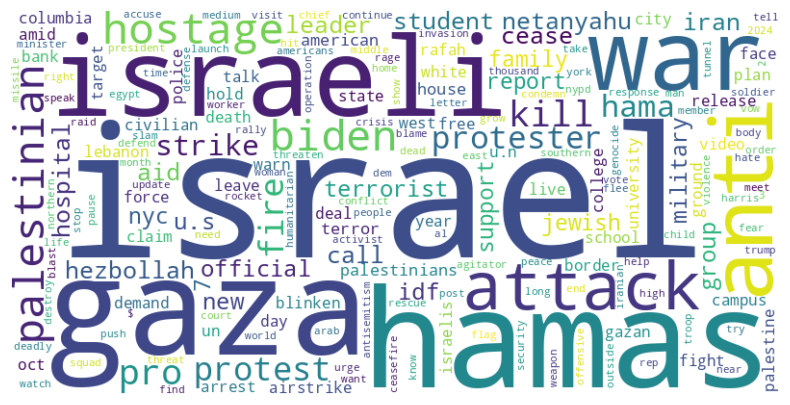

In [20]:
df = data_cleaned

nlp = spacy.load("en_core_web_sm")

custom_stopwords =r'C:\Users\NejlaHidic\Desktop\Uni\Foundations of CSS\Project\data\cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[('israel', 6281), ('hamas', 3143), ('gaza', 3092), ('israeli', 1924), ('war', 1556), ('anti', 1130), ('attack', 1019), ('hostage', 1004), ('palestinian', 981), ('biden', 966)]


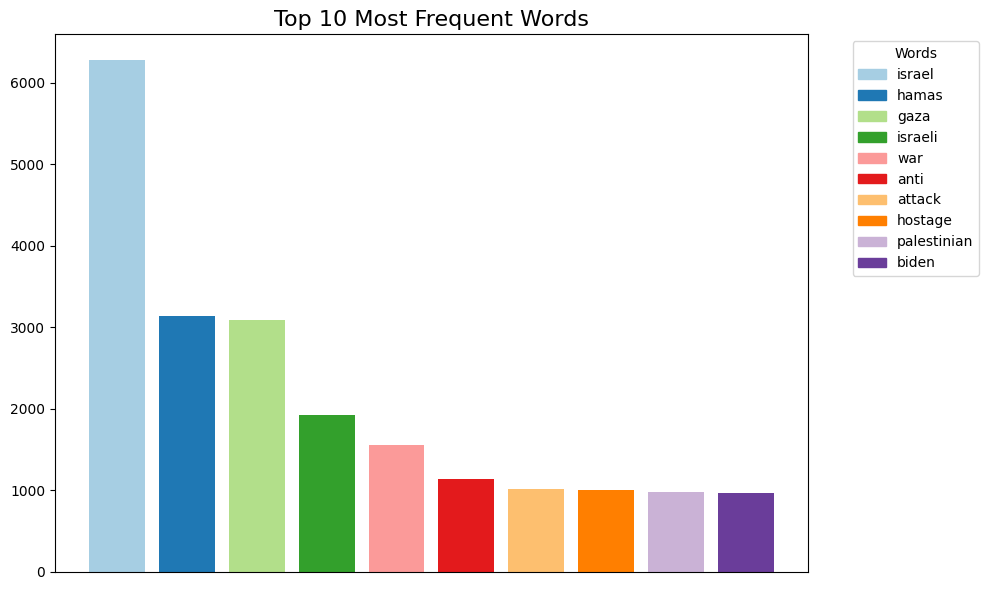

In [52]:
common_words = word_counts.most_common(10)
print(common_words)

words, counts = zip(*common_words)

colors = plt.cm.Paired.colors

frame_color_dict = {frame: color for frame, color in zip(frames, colors)}

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color=colors)

plt.xticks([])

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = words
plt.legend(handles, labels, title="Words", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=1)

plt.title('Top 10 Most Frequent Words', fontsize=16)

plt.tight_layout()
plt.show()

In [48]:

frame_keywords = {
    "War Frame": ["war", "attack", "kill", "hostage", "strike", "fire", "hezbollah", "iran", "netanyahu"],
    "Political / Leadership Frame": ["biden", "netanyahu", "leader", "call", "pro", "student", "aid"],
    "Humanitarian / Victimhood Frame": ["hospital", "aid", "protest", "protester", "victim", "student", "war"],
    "Ideological / Partisan Frame": ["anti", "pro", "biden", "netanyahu", "hezbollah", "iran"],
    "Security / Military Justification Frame": ["defense", "terrorist", "terror", "kill", "strike", "attack"],
    "International Relations Frame": ["biden", "iran", "hezbollah", "netanyahu", "call", "cease"],
    "Protest / Civil Disobedience Frame": ["protest", "protester", "student", "call"],
    "Media Framing / Narrative Framing": ["biden", "call", "aid", "terrorist", "terror", "strike"]
}


def count_frame_keywords(df, frame_keywords):
    frame_counts = {frame: 0 for frame in frame_keywords}

    for index, row in df.iterrows():
        processed_title = preprocess_text_spacy(row['Title'])


        for frame, keywords in frame_keywords.items():
            for keyword in keywords:
                if keyword in processed_title:
                    frame_counts[frame] += 1
                    break

    return frame_counts


frame_counts = count_frame_keywords(df, frame_keywords)

sorted_frame_counts = sorted(frame_counts.items(), key=lambda x: x[1], reverse=True)

sorted_frames, sorted_counts = zip(*sorted_frame_counts)

print("Sorted frame counts (from largest to smallest):")
for frame, count in sorted_frame_counts:
    print(f"{frame}: {count}")

Sorted frame counts (from largest to smallest):
War Frame: 5594
Ideological / Partisan Frame: 4522
Political / Leadership Frame: 4404
Humanitarian / Victimhood Frame: 4061
Media Framing / Narrative Framing: 2917
International Relations Frame: 2767
Security / Military Justification Frame: 2510
Protest / Civil Disobedience Frame: 1756


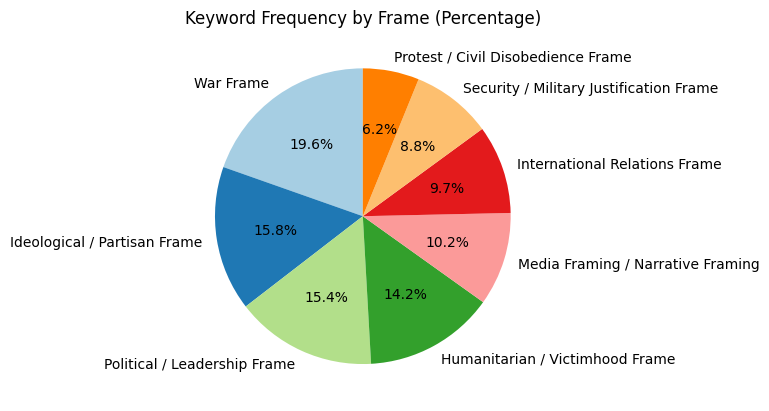

In [51]:
total_count = sum(counts)

percentages = [(count / total_count) * 100 for count in counts]

frame_percentage_pairs = list(zip(frames, percentages))

sorted_frame_percentage_pairs = sorted(frame_percentage_pairs, key=lambda x: x[1], reverse=True)

sorted_frames, sorted_percentages = zip(*sorted_frame_percentage_pairs)

plt.pie(sorted_percentages, labels=sorted_frames, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Keyword Frequency by Frame (Percentage)')

plt.show()

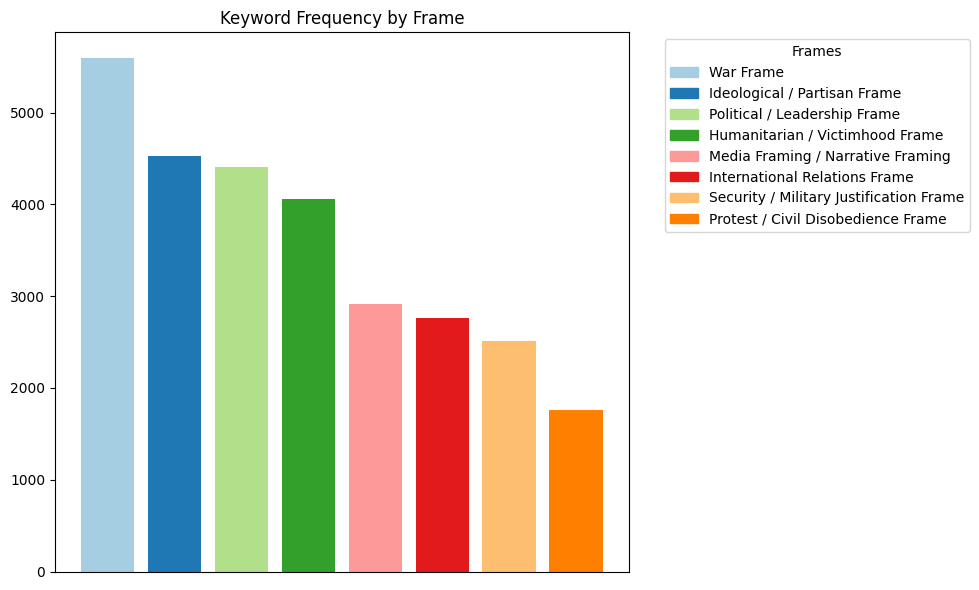

In [50]:
frames = list(frame_counts.keys())
counts = list(frame_counts.values())

frame_count_pairs = list(zip(frames, counts))

sorted_frame_count_pairs = sorted(frame_count_pairs, key=lambda x: x[1], reverse=True)

sorted_frames, sorted_counts = zip(*sorted_frame_count_pairs)

sorted_colors = plt.cm.Paired.colors[:len(sorted_frames)]

plt.figure(figsize=(10, 6))
plt.bar(sorted_frames, sorted_counts, color=sorted_colors)

plt.xticks([])

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sorted_colors]
plt.legend(handles, sorted_frames, title="Frames", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Keyword Frequency by Frame')

plt.tight_layout()
plt.show()

## Emotional tone

In [32]:
! pip install tf_keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 1.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 10.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 1.6/390.2 MB 49.6 MB/s eta 0:00:08
   ---------------------------------------- 3.1/390.2 MB 39.4 MB/s eta 0:00:10
    --------------------------------------- 5.7/390.2 MB 45.5 MB/s eta 0:00:09
    --------------------------------------- 7.1/390.2 MB 45.5 MB/s eta 0:00:09
    --------------------------------------- 7.2/390.2 MB 35.3 MB/s eta 0:00:11
    --------------------------------------- 9.3/390.2 MB 37.1 MB/s eta 0:00:11
   - ------

  You can safely remove it manually.


In [34]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize emotion analysis pipeline
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Analyze emotions for all headlines
def analyze_emotions(text, emotion_analyzer):
    """
    Analyze emotions for a given text and return scores for each emotion.
    """
    if pd.notnull(text):
        emotions = emotion_analyzer(text)
        return {e['label']: e['score'] for e in emotions[0]}
    return {}

# Apply emotion analysis and extract actors
data_cleaned['Emotion Scores'] = data_cleaned['Title'].apply(lambda x: analyze_emotions(x, emotion_analyzer))
data_cleaned['Extracted Actors'] = data_cleaned['Title'].apply(lambda x: extract_keywords_and_terms(x, actors, {}))

# Convert emotion scores into separate columns
emotion_df = pd.json_normalize(data_cleaned['Emotion Scores'])
emotion_df['Media Outlet'] = data_cleaned['Outlet']  # Add media outlet for grouping
emotion_df['Actors'] = data_cleaned['Extracted Actors']  # Add extracted actors
emotion_df['Title'] = data_cleaned['Title']  # Add original title

# Explode actors into separate rows for analysis
emotion_df = emotion_df.explode('Actors').dropna(subset=['Actors'])

# Group by actor and media outlet to calculate average emotion scores
actor_emotion_by_outlet = emotion_df.groupby(['Actors', 'Media Outlet']).mean().reset_index()

# Visualization 1: Bar plot for emotional tones by actor
plt.figure(figsize=(12, 6))
actor_emotion_by_outlet.groupby('Actors').mean().drop(columns=['Media Outlet']).plot(kind='bar', figsize=(12, 6))
plt.title("Average Emotional Tone by Actor")
plt.ylabel("Average Emotion Score")
plt.xlabel("Emotion")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Visualization 2: Heatmap for actors and emotions by outlet
actor_outlet_emotion = actor_emotion_by_outlet.pivot_table(
    index='Actors', columns='Media Outlet', values='joy'  # Change 'joy' to analyze different emotions
).fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(actor_outlet_emotion, cmap='coolwarm', annot=True, cbar_kws={'label': 'Average Joy Score'})
plt.title("Emotion (Joy) by Actor and Media Outlet")
plt.xlabel("Media Outlet")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()

RuntimeError: Failed to import transformers.models.roberta.modeling_tf_roberta because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

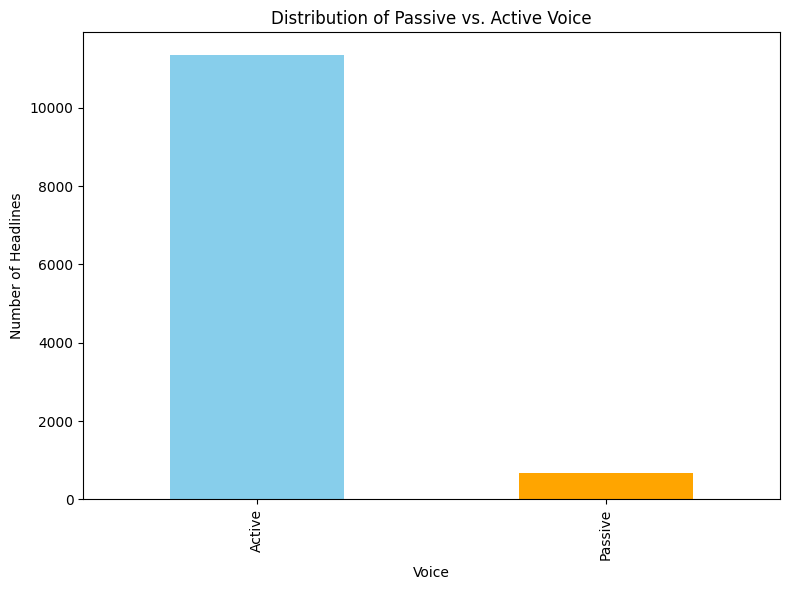

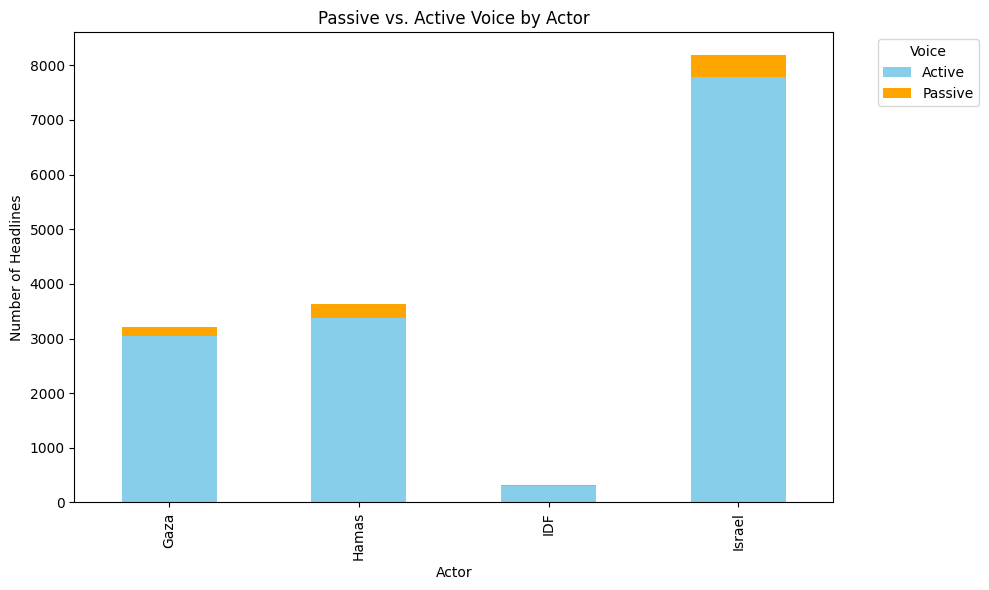

KeyError: 'Outlet'

In [35]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to determine passive or active voice
def is_passive(text):
    """
    Determine if a sentence is in passive voice.
    Returns True for passive, False for active.
    """
    doc = nlp(text)
    for token in doc:
        # Look for auxiliary verbs indicating passive voice
        if token.dep_ == "auxpass":
            return True
    return False

# Apply passive/active detection
data_cleaned['Voice'] = data_cleaned['Title'].apply(lambda x: 'Passive' if is_passive(x) else 'Active')

# Count passive vs. active usage overall
voice_counts = data_cleaned['Voice'].value_counts()

# Plot passive vs. active voice distribution
plt.figure(figsize=(8, 6))
voice_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Passive vs. Active Voice")
plt.xlabel("Voice")
plt.ylabel("Number of Headlines")
plt.tight_layout()
plt.show()

# Analyze passive vs. active voice by actor
data_cleaned['Extracted Actors'] = data_cleaned['Title'].apply(lambda x: extract_keywords_and_terms(x, actors, {}))
actor_voice_data = data_cleaned.explode('Extracted Actors').dropna(subset=['Extracted Actors'])

actor_voice_counts = actor_voice_data.groupby(['Extracted Actors', 'Voice']).size().unstack(fill_value=0)

# Plot passive vs. active voice by actor
actor_voice_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Passive vs. Active Voice by Actor")
plt.ylabel("Number of Headlines")
plt.xlabel("Actor")
plt.legend(title="Voice", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Analyze passive vs. active voice by media outlet
outlet_voice_counts = data_cleaned.groupby(['Outlet', 'Voice']).size().unstack(fill_value=0)

# Plot passive vs. active voice by media outlet
outlet_voice_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])
plt.title("Passive vs. Active Voice by Media Outlet")
plt.ylabel("Number of Headlines")
plt.xlabel("Media Outlet")
plt.legend(title="Voice", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()